In [1]:
# Load the drive helper and mount
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
#After executing the cell above
os.chdir ("/content/drive/My Drive")
!ls

 077f7041-29ab-45cd-81dd-42e6afe0df97.pdf
 11.jpg
 201900096721_FORM.pdf
 74.png
'Auto Call Recorder'
'BJAZ mPolicy OG-20-1703-1802-00014633.pdf'
 CENTRAL_BANK_OF_INDIA_SIP_Groww_Mandate.gdoc
 CENTRAL_BANK_OF_INDIA_SIP_Groww_Mandate.pdf
'Colab Notebooks'
'Customer_retention_dataset--1- (1).zip'
'Deep learning AI project.csv'
 IMG20210911131824.jpg
 Malignant_comments_test.csv
 Malignant_comments_train.csv
'mushroom project.json'
 OD119622059168981000-2.pdf
 PDF50047723633002625102020043810307270.pdf
 photo_2021-03-18_17-42-20.jpg
 photo_2021-03-18_17-42-45.jpg
 Plant_images_pianalytix
'Receipt pay_FbbPMM4utaoQqj from DataTrained (Paid).pdf'
'Receipt pay_FoI5zZ80qkvnKa from DataTrained (Paid).pdf'
'Receipt pay_GMQL1TuU2skJfO from DataTrained (Paid) (1).pdf'
'Receipt pay_GMQL1TuU2skJfO from DataTrained (Paid).pdf'
'Sumukh Ananad Sinai Kunde Resume3 (1).pdf'
'Sumukh Ananad Sinai Kunde Resume3.pdf'
'SUMUKH ANAND SINAI KUNDE (1).docx'
'SUMUKH ANAND SINAI KUNDE.docx'
'Sumukh kunde - 2021-01-

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random 
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array,array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Flatten,Dropout,Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical


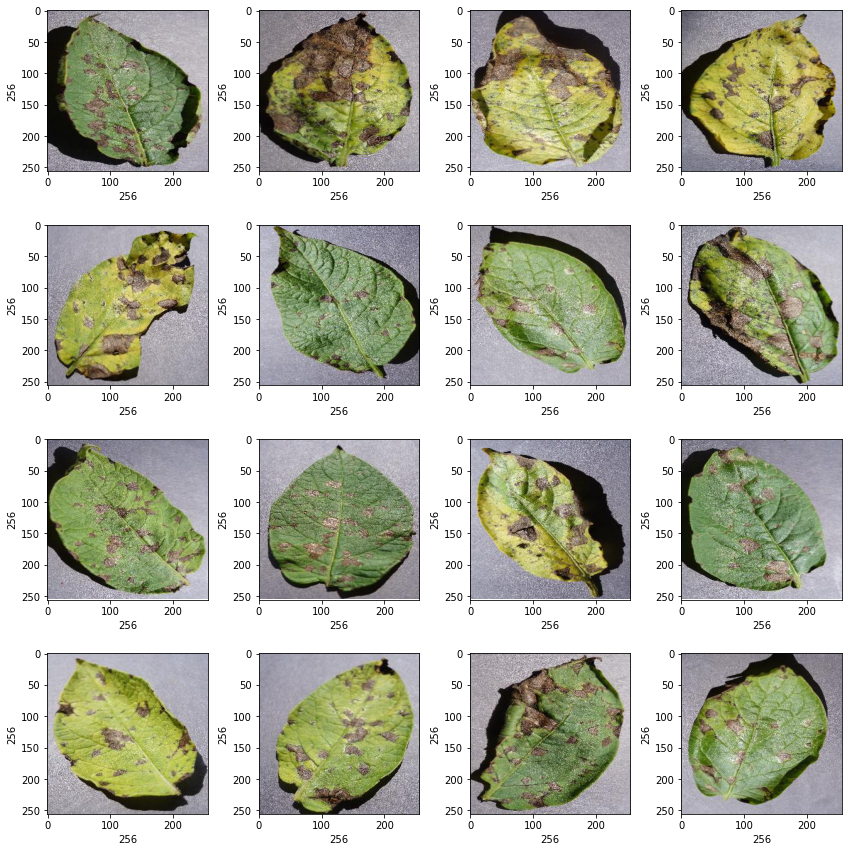

In [36]:
#Plotting 12  images to check dataset
plt.figure(figsize=(12,12))
path="/content/drive/MyDrive/Plant_images_pianalytix/Potato___Early_blight"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img=imread(path +'/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1],fontsize=10)#width of image
  plt.ylabel(rand_img.shape[0],fontsize=10)#height of the image



In [39]:
#Converting image into array
def convert_image_to_array(image_dir):
  try:
    image=cv2.imread(image_dir)
    if image is not None:
      image=cv2.resize(image,(256,256))
      #image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
      return img_to_array(image)
    else :
      return np.array([])
  except Exception as e:
      print(f"Error :{e}")
      return None



In [44]:
dir = "/content/drive/My Drive/Plant_images_pianalytix"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])


In [46]:
#Visualize the number of classes count
labels_count=pd.DataFrame(label_list).value_counts()

In [48]:
labels_count.head()

2    300
1    300
0    300
dtype: int64

In [50]:
image_list[0].shape

(256, 256, 3)

In [51]:
label_list=np.array(label_list)
label_list.shape

(900,)

In [53]:
x_train,x_test,y_train,y_test=train_test_split(image_list,label_list,test_size=0.2,random_state=10)


In [55]:
x_train=np.array(x_train,dtype=np.float16)/255.0
x_test=np.array(x_test,dtype=np.float16)/255.0
x_train=x_train.reshape(-1,256,256,3)
x_test=x_test.reshape(-1,256,256,3)

In [56]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [57]:
y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [62]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28224)             0         
_________________________________________________________________
dense (Dense)                (None, 8)                 225800    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 2

In [63]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(0.0001),metrics=['accuracy'])

In [64]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2)

In [65]:
epochs=50
batch_size=128
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,
                  validation_data=(x_val,y_val))

Epoch 1/50
5/5 [==============================] - 31s 518ms/step - loss: 1.1169 - accuracy: 0.3177 - val_loss: 1.0975 - val_accuracy: 0.4236
Epoch 2/50
5/5 [==============================] - 1s 197ms/step - loss: 1.0883 - accuracy: 0.3594 - val_loss: 1.0801 - val_accuracy: 0.2569
Epoch 3/50
5/5 [==============================] - 1s 198ms/step - loss: 1.0339 - accuracy: 0.3594 - val_loss: 1.0340 - val_accuracy: 0.2569
Epoch 4/50
5/5 [==============================] - 1s 195ms/step - loss: 0.9795 - accuracy: 0.4410 - val_loss: 0.9948 - val_accuracy: 0.2986
Epoch 5/50
5/5 [==============================] - 1s 201ms/step - loss: 0.9220 - accuracy: 0.3733 - val_loss: 0.9731 - val_accuracy: 0.2708
Epoch 6/50
5/5 [==============================] - 1s 197ms/step - loss: 0.8712 - accuracy: 0.4097 - val_loss: 0.9225 - val_accuracy: 0.4931
Epoch 7/50
5/5 [==============================] - 1s 196ms/step - loss: 0.8267 - accuracy: 0.5417 - val_loss: 0.8977 - val_accuracy: 0.4653
Epoch 8/50
5/5 [===

In [66]:
model.save("/content/drive/My Drive/plant_disease.h5")
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('/content/drive/My Drive/plant_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('/content/drive/My Drive/plant_model_weights.h5')

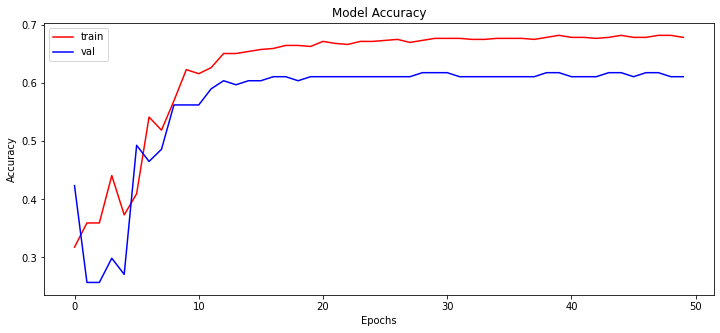

In [67]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [68]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 1s 62ms/step - loss: 0.7470 - accuracy: 0.6333
Test Accuracy: 63.333332538604736


In [69]:
y_pred = model.predict(x_test)

In [70]:
y_pred

array([[3.38561207e-01, 3.39164943e-01, 3.22273821e-01],
       [3.38561207e-01, 3.39164943e-01, 3.22273821e-01],
       [1.42648909e-03, 8.05002730e-03, 9.90523517e-01],
       [3.38561207e-01, 3.39164943e-01, 3.22273821e-01],
       [3.38561207e-01, 3.39164943e-01, 3.22273821e-01],
       [1.92109678e-06, 6.15080789e-05, 9.99936581e-01],
       [3.38561207e-01, 3.39164943e-01, 3.22273821e-01],
       [3.38561207e-01, 3.39164943e-01, 3.22273821e-01],
       [3.38561207e-01, 3.39164943e-01, 3.22273821e-01],
       [3.38561207e-01, 3.39164943e-01, 3.22273821e-01],
       [3.38561207e-01, 3.39164943e-01, 3.22273821e-01],
       [3.38561207e-01, 3.39164943e-01, 3.22273821e-01],
       [5.80188462e-05, 7.59917602e-04, 9.99182045e-01],
       [7.69094913e-06, 1.71149833e-04, 9.99821246e-01],
       [3.38561207e-01, 3.39164943e-01, 3.22273821e-01],
       [1.76713525e-04, 1.72784249e-03, 9.98095453e-01],
       [3.38561207e-01, 3.39164943e-01, 3.22273821e-01],
       [3.38561207e-01, 3.39164

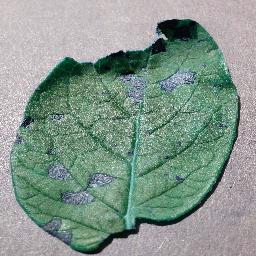

In [71]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

In [72]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight



We started with loading the dataset into google colab using google drive and visualizing the images. Normalizing is an important step when working with any type of dataset. After that we created a CNN Model which is further used for predicting the plant diseases using the image supplied to model. This model is highly beneficial as it can be used by different agricultural firms and farmers to increase their yield and stop wastage of crops due to disease.